In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\Admin\Desktop\Task3\IRIS.csv')

In [3]:
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [6]:
df.shape

(150, 5)

In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
def converter(s):
    s=s.lower()
    if s=='iris-versicolor':
      return 0
    elif s=='iris-versicolor':
        return 1
    elif s=='iris-viginica':
        return 2
    else:
        return -1

In [14]:
df=pd.read_csv(r'C:\Users\Admin\Desktop\Task3\IRIS.csv',converters={"species":converter})

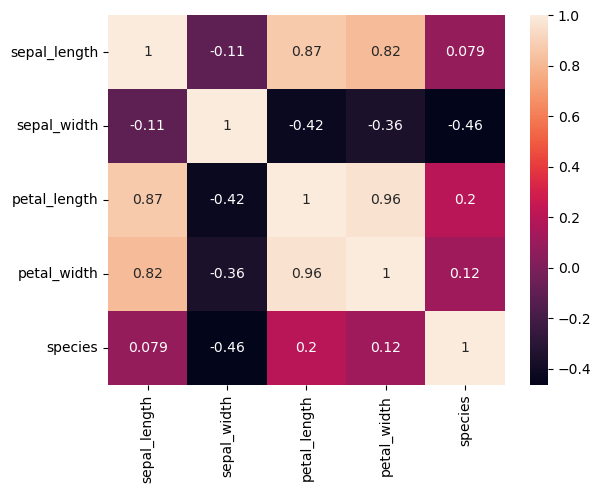

In [15]:
sb.heatmap(df.corr(),annot=True)
plt.show()

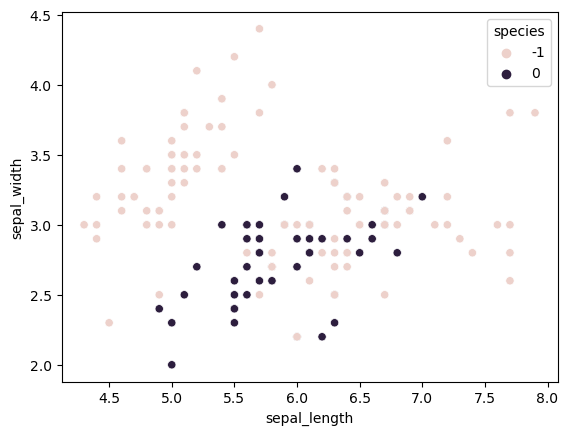

In [16]:
sb.scatterplot(data=df,x='sepal_length',y='sepal_width',hue='species')
plt.show()

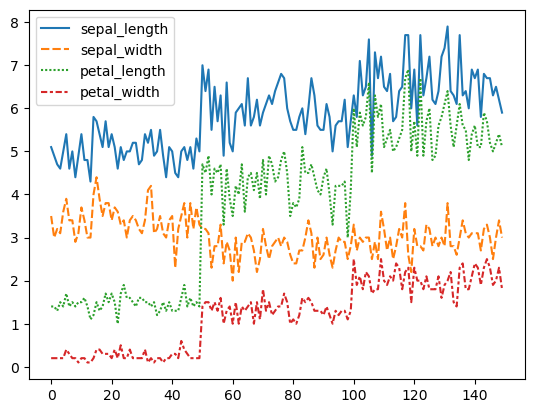

In [17]:
sb.lineplot(data=df.drop(['species'],axis=1))
plt.show()

D:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


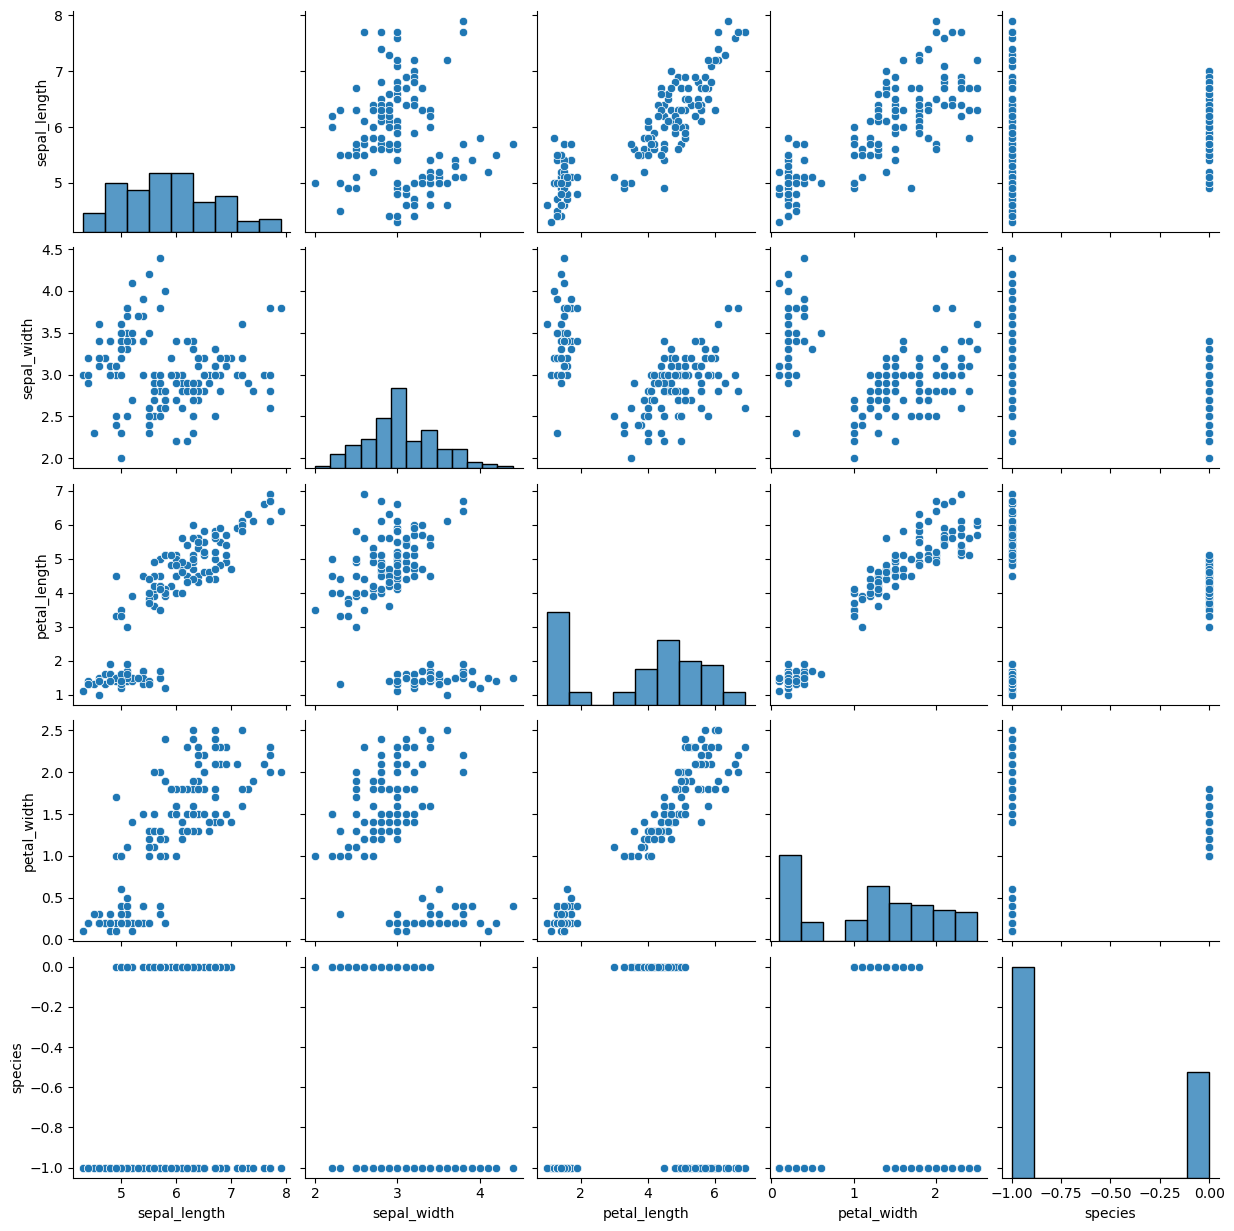

In [18]:
sb.pairplot(df)

D:\Users\Admin\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1000x500 with 0 Axes>

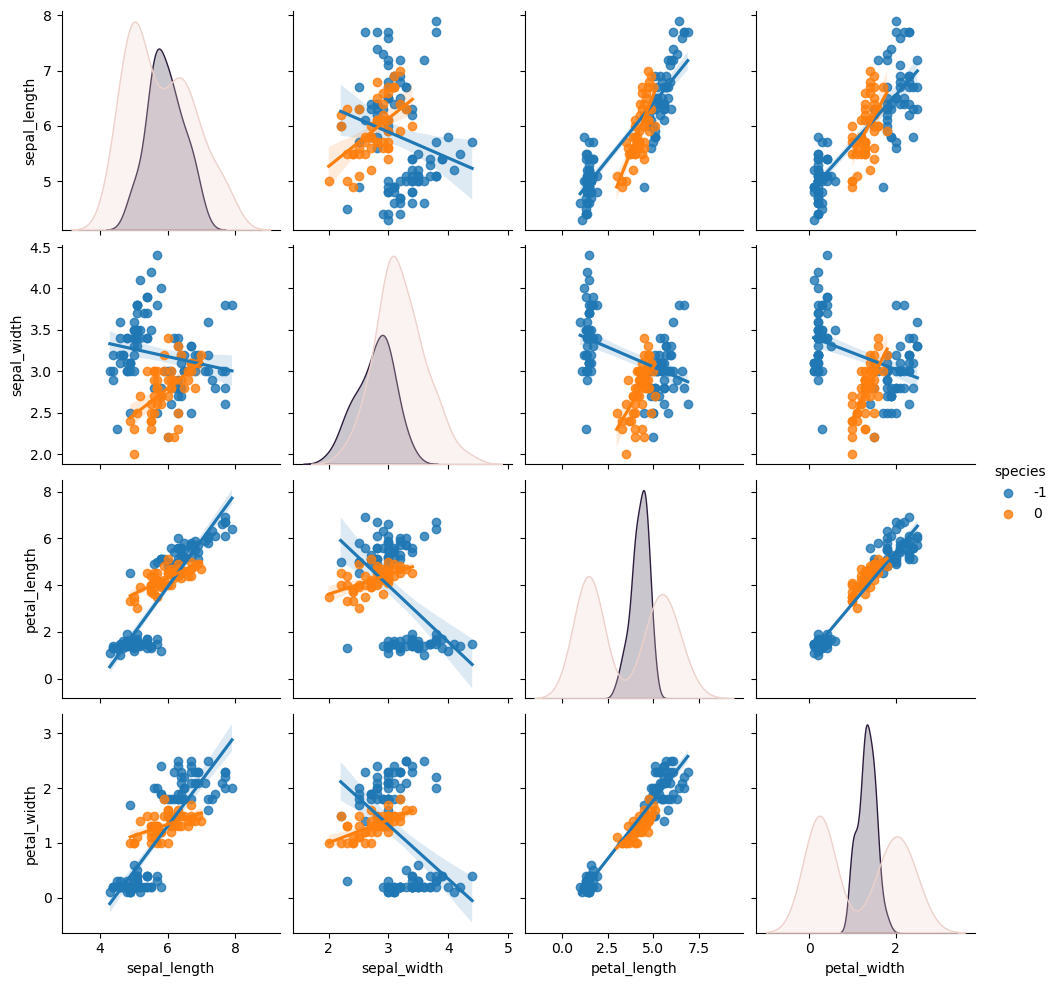

In [19]:
plt.figure(figsize=(10,5));
sb.pairplot(df,kind='reg',hue='species');


In [21]:
from sklearn.model_selection import train_test_split
from sklearn import metrics  # Correct import
from sklearn.linear_model import LinearRegression


In [22]:
features = df[['sepal_length','sepal_width','petal_length','petal_width']]
labels=df["species"]

In [23]:
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.25)

In [24]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [25]:
print(lm.intercept_)

0.4165387869323135


In [26]:
predictions=lm.predict(x_test)

In [28]:
print('MAE:',metrics.mean_absolute_error(y_test,predictions))
print('MSE:',metrics.mean_squared_error(y_test,predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,predictions)))
      

MAE: 0.31744130025597234
MSE: 0.14803143404015753
RMSE: 0.38474853351267957


In [30]:
from sklearn import metrics  # Correct module is 'metrics', not 'metrices'
from sklearn.linear_model import LogisticRegression


In [31]:
lreg=LogisticRegression()
lreg.fit(features,labels)
labels_pred=lreg.predict(features)
metrics.accuracy_score(labels,labels_pred)
print("The model's accuracy is:",round(metrics.accuracy_score(labels,labels_pred)*100,2),"%")

The model's accuracy is: 72.67 %


In [32]:
#importing the KNeigbors classifier packaging
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [33]:
x=df.drop("species",axis=1)
y=df["species"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [34]:
kn=KNeighborsClassifier(n_neighbors = 1,p=5)
kn.fit(x_train,y_train)
print("The accuracy of the model is:", round(kn.score(x_test,y_test)*100,2),"%")

The accuracy of the model is: 97.37 %


In [35]:
y_test

114   -1
62     0
33    -1
107   -1
7     -1
100   -1
40    -1
86     0
76     0
71     0
134   -1
51     0
73     0
54     0
63     0
37    -1
78     0
90     0
45    -1
16    -1
121   -1
66     0
24    -1
8     -1
126   -1
22    -1
44    -1
97     0
93     0
26    -1
137   -1
84     0
27    -1
127   -1
132   -1
59     0
18    -1
83     0
Name: species, dtype: int64

In [36]:
x_test

,sepal_length,sepal_width,petal_length,petal_width
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2
100,6.3,3.3,6.0,2.5
40,5.0,3.5,1.3,0.3
86,6.7,3.1,4.7,1.5
76,6.8,2.8,4.8,1.4
71,6.1,2.8,4.0,1.3
